# Gradient descent and Logistic regression

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn import datasets, metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

## 1. Univariate linear regression with gradient descent

#### Question 1

You can write math in markdown cells using LaTeX. For inline math, use `$...$`. For display math, use `$$...$$`.

For example, you can write the MSE loss function as

$$ L(w_0, w_1) = \frac{1}{N} \sum_{i=0}^{N-1} \epsilon_i(w_0, w_1)^2$$
    
where $\epsilon_i(w_0, w_1) = y_i - (w_0 + w_1 x_i)$ are the residuals.

`<Your Solution Here>` $\nabla_w L =
\begin{bmatrix}
 -\frac{2}{N} \sum_{i=0}^{N-1} \epsilon_i(w_0, w_1) \\
 \\
 -\frac{2}{N} \sum_{i=0}^{N-1} x_i \epsilon_i(w_0, w_1) \\
\end{bmatrix}=-\frac{2}{N}\begin{bmatrix}
 \sum_{i=0}^{N-1} \epsilon_i(w_0, w_1) \\
 \\
 \sum_{i=0}^{N-1} x_i \epsilon_i(w_0, w_1) \\
\end{bmatrix}$

---

solution is a vector^

lin alg måten med regression er en loss functioin hvor man måler normalen fra expected linjen

Start by loading and visualizing the data from `unilinear.npy`. Use `np.load` to load the data and `plt.scatter` to visualize it.

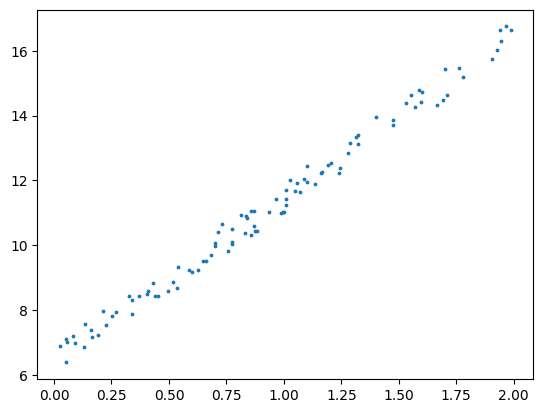

In [42]:
# Read the x and y values from unilinear.csv
datapoints = np.load('unilinear.npy')
X, Y = datapoints[:,0], datapoints[:,1]

plt.scatter(X,Y, 3)

plt.show()

#### Question 2

In [43]:
def gradient_loss_function(X: np.ndarray, Y: np.ndarray, w: np.ndarray) -> np.ndarray:
    """
    Returns the gradient of the MSE loss function for the given data points and weights
    """
    N = len(X)
    predictions = w[0] + w[1] * X
    residuals = Y - predictions
    
    w_0 = -2/N * np.sum(residuals)
    w_1 = -2/N * np.sum(X * residuals)
    
    return np.array([w_0, w_1])

    
def gradient_descent(
    X: np.ndarray, 
    Y: np.ndarray,
    weights: np.ndarray=np.array([0, 0]),
    learning_rate: float=0.1,
    iterations: int=1000,
    tolerance: float=1e-6,
) -> np.ndarray:
    """
    Iteratively updates the weights using the steepest descent method
    """

    for i in range(iterations):
        gradient = gradient_loss_function(X, Y, weights)
        new_weights = weights - learning_rate * gradient

        weights = new_weights
        
    return weights
    

#### Question 3
We test our gradient descent implementation iterating $40$ times with a learning rate of $\eta=0.1$. In addition, we plot the fitted line together with the original datapoints to visually comfirm that our implementation works.

[6.45478709 5.02129039]


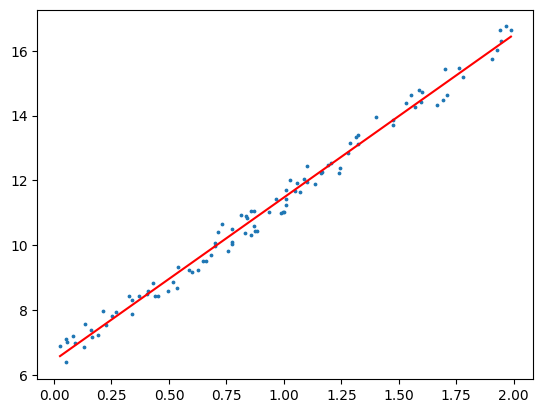

In [44]:
# Run gradient descent and print the found weights
weights = gradient_descent(X,Y)

# Plot data points and the fitted linear function

plt.scatter(X,Y, 3)

x_vals = np.linspace(min(X), max(X), 100) 
y_vals = weights[0] + weights[1] * x_vals
print(weights)

plt.plot(x_vals, y_vals, color='red') 

plt.show()

#### Question 4
Compute the closed form solution $X^+Y=(X^TX)^{-1}X^TY$ using NumPy.

In [45]:
def closed_form_solution(X: np.ndarray, Y: np.ndarray) -> np.ndarray:
    """
    Computes the closed form solution of the loss minimization pb
    """

    #[[1. 0.01]
    # [1. 0.01]
    # [1. 0.05]]
    ones = np.ones_like(X)
    f_X = np.column_stack([ones, X])
    f_XT = f_X.T

    # why penrose inversion compared?
    # ig in case of X being linearly dependent
    # and then having a smaller rank then needed
    #
    # (X^T X)^-1 X^T Y
    return np.linalg.pinv(f_XT @ f_X) @ f_X.T @ Y

weights_exp = closed_form_solution(X, Y)

print(f"The weights found using the closed form solution are: {weights_exp}")

weights = gradient_descent(X, Y, learning_rate=0.1, iterations=1000)
print(f"The absolute differences between the weights using the two methods are {np.abs(weights - weights_exp)}")

The weights found using the closed form solution are: [6.45478709 5.02129039]
The absolute differences between the weights using the two methods are [2.78888024e-13 2.59348099e-13]


#### Question 5
Let us now perform gradient descent using different values for the learning rate.

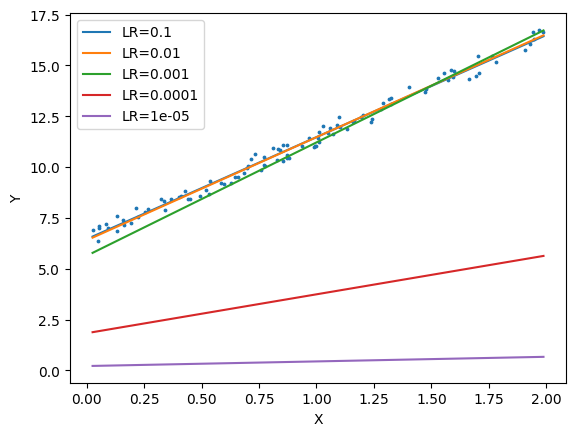

In [46]:
learning_rates = [10**(-i) for i in range(1, 6)]
# removed for high learning values so gradient doesnt go toward inf

plt.scatter(X,Y, 3)

for learning_rate in learning_rates:
    weights = gradient_descent(X, Y, learning_rate=learning_rate, iterations=1000)
    x_vals = np.linspace(min(X), max(X), 100) 
    y_vals = weights[0] + weights[1] * x_vals
    plt.plot(x_vals, y_vals, label=f'LR={learning_rate}')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()


plt.show()

#### Question 6

Let us first define the MSE loss function.

In [47]:
def mse_loss(X: np.ndarray, Y: np.ndarray, weights: np.ndarray) -> float:
    """
    Returns the mean squared error loss for the given data points and weights
    """
    N = len(X)

    loss = sum([(Y[i] - (weights[0] + weights[1] * X[i]))**2 for i in range(N)])/N

    return loss


In [48]:
def random_weights(X: np.ndarray, Y: np.ndarray) -> np.ndarray:
    random_indices = np.random.choice(len(X), 2, replace=False)
    x_random = X[random_indices]
    y_random = Y[random_indices]

    w_1 = np.abs((y_random[1] - y_random[0])/(x_random[1]-x_random[0]))
    w_0 = y_random[0] - w_1 * x_random[0]

    return np.array([w_0, w_1])

def actually_random_weights() -> np.ndarray:
    w_0 = np.random.uniform(-20, 20)
    w_1 = np.random.uniform(-20, 20)
    return np.array([w_0, w_1])

We now plot the loss function $L$ as a function of the weights $w_0$ and $w_1$ using a contour plot. We also plot the trajectory of the weights during the gradient descent optimization.

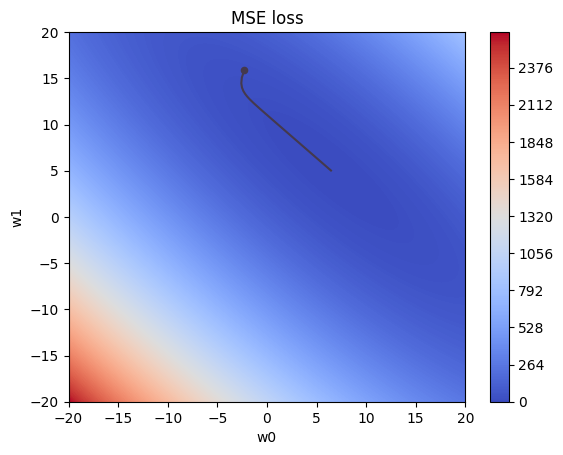

In [49]:
# Plot a contour plot of the loss function
# Create a grid of weights
w0_values = np.linspace(-20, 20, 100)
w1_values = np.linspace(-20, 20, 100)
W0, W1 = np.meshgrid(w0_values, w1_values)

# Compute the loss for each pair of weights
loss = np.zeros_like(W0)
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        loss[i, j] = mse_loss(X, Y, np.array([W0[i, j], W1[i, j]]))

# Plot the loss function
fig, ax = plt.subplots()
ax.set_title("MSE loss")
ax.set_xlabel("w0")
ax.set_ylabel("w1")
contour = ax.contourf(W0, W1, loss, levels=500, cmap="coolwarm")
fig.colorbar(contour)

# Plot the path of the gradient descent algorithm onto ax using ax.plot
# Experiment with different learning rates and initial weights
learning_rate = 0.1 #TODO!
weights = actually_random_weights() #TODO!
n_iter = 1000 #TODO!


W_0 = [weights[0]] 
W_1 = [weights[1]]
for i in range(n_iter):
    gradient = gradient_loss_function(X,Y, weights)
    new_weights = weights - learning_rate * gradient
    W_0.append(new_weights[0])
    W_1.append(new_weights[1])

    weights = new_weights

ax.plot(W_0, W_1, color='#44394D')
ax.scatter(W_0[0], W_1[0], color='#44394D', s=20, label='Starting Point')
plt.show()


## 2. Logistic Regression

### 2.1 Logistic regression on two classes

#### Question 1

We load the Iris dataset using the built-in function from `sklearn`.

In [50]:
iris = datasets.load_iris()
print(f"Features: {iris.feature_names}")
print(f"Labels: {iris.target_names}")


# Extract the feature petal width (index 3)
X = iris.data[:,3].reshape(-1, 1) 

# Convert labels to binary labels with 1 for Virginica and 0 for others (Setosa and Versicolor)
y = np.array([1 if label == 2 else 0 for label in iris.target])

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels: ['setosa' 'versicolor' 'virginica']
X shape: (150, 1)
y shape: (150,)


*X couldn't be 1 dimensional grr*

We now split the dataset into training and test data.

In [51]:
# Fix random seed for reproducibility
seed = 42                 
# Shuffle and split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=seed
)

print(f"Train set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Train set size: 105
Test set size: 45


#### Question 2

Fitting a linear regression model using `sklearn`'s `LinearRegression` class. Use the `fit` method to fit the model to the training data.

In [52]:
linear_regression = LinearRegression()

# Fit the model
linear_regression.fit(X_train, y_train)

LinearRegression()

#### Question 3

Fitting a logistic regression model using the `LogisticRegression` class. Again, use the `fit` method to fit the model to the training data.

In [53]:
logit = LogisticRegression()

# Fit the model
logit.fit(X_train, y_train)

LogisticRegression()

#### Question 4

We can now plot the datapoints and the probabilities predicted by the two models for different values of `petal width`.

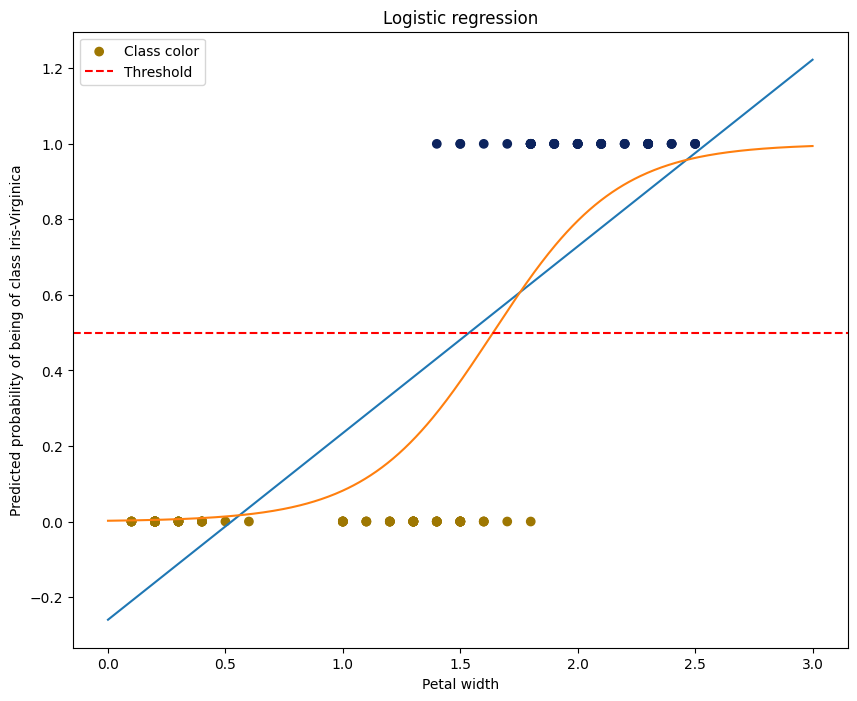

In [54]:
# Plot the data points
fig, ax = plt.subplots(figsize=(10,8))
cmap = mcolors.ListedColormap(["#9E7702", "#0C235D"])
ax.scatter(X, y, c=y, cmap=cmap, label='Class color')

# Plot linear regression predictions (use linear_regression.predict to get the predicted values)
X_grid = np.linspace(0, 3, 500).reshape(-1, 1)
Y_grid_lin_reg = linear_regression.predict(X_grid)
ax.plot(X_grid, Y_grid_lin_reg)

# Plot Logistic regression predictions (use logit.predict_proba instead of logit.predict to get probabilities)
Y_grid_prob = logit.predict_proba(X_grid)
ax.plot(X_grid, Y_grid_prob[:,1])

ax.set_title("Logistic regression")
ax.set_xlabel("Petal width")
ax.set_ylabel("Predicted probability of being of class Iris-Virginica")

# Horizontal line at y=0.5
ax.axhline(0.5, color="red", linestyle="--", label="Threshold")

ax.legend(loc='best')
plt.show()

Note that the linear regression model predicts values outside of the interval $[0,1]$ which does not makes sense when talking about probabilities.

#### Question 5

Evaluate the two models on the test data. We set the cutoff value to $0.5$.

In [55]:
# Compute the test accuracy for the linear and logistic regression models
y_pred_linear = (linear_regression.predict(X_test) > 0.5)
test_accuracy_linear = metrics.accuracy_score(y_test, y_pred_linear)

y_pred_logit =  (logit.predict(X_test) > 0.5)
test_accuracy_logit = metrics.accuracy_score(y_test, y_pred_logit)

# Print the test accuracies
print(f"Accuracy of the linar: {test_accuracy_linear:.2f}")
print(f"Accuracy of the logit: {test_accuracy_logit:.2f}")

Accuracy of the linar: 0.96
Accuracy of the logit: 1.00


### 2.2 Multi class logistic regression

#### Question 1

We will now use two features, namely `petal width (cm)` and  `petal length (cm)`, and keep all three labels as they appear in the original dataset.

In [56]:
# Load the iris dataset
iris = datasets.load_iris()

# Extract the features petal length and petal width
X = iris.data[:,2:]

# Use targets 0, 1 and 2 as is
y = iris.target

# Print the shapes of X and y
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (150, 2)
y shape: (150,)


Split the dataset into training, validation and test data.

In [57]:
# Fix random seed for reproducibility
seed = 0
# Shuffle and split the data
X_train, X_val_test, y_train, y_val_test = train_test_split(
    X, y, train_size=0.7, random_state=seed
)
X_val, X_test, y_val, y_test = train_test_split(
    X_val_test, y_val_test, train_size=0.5, random_state=seed
)

#### Question 2

Fitting a multi-class logistic regression model is just as easy as fitting a binary one.

Note that the `LogisticRegression` class automatically detects that we have more than two classes and selects the appropriate loss function. The use of the keyword argument `multi_class` is deprecated in newer versions of `sklearn` but you will still see it in many examples online.

In [58]:
logit = LogisticRegression()

# Fit the model
logit.fit(X_train, y_train)

LogisticRegression()

#### Question 3

We plot the datapoints together with the decision boundaries of our multi-class logistic classifier.

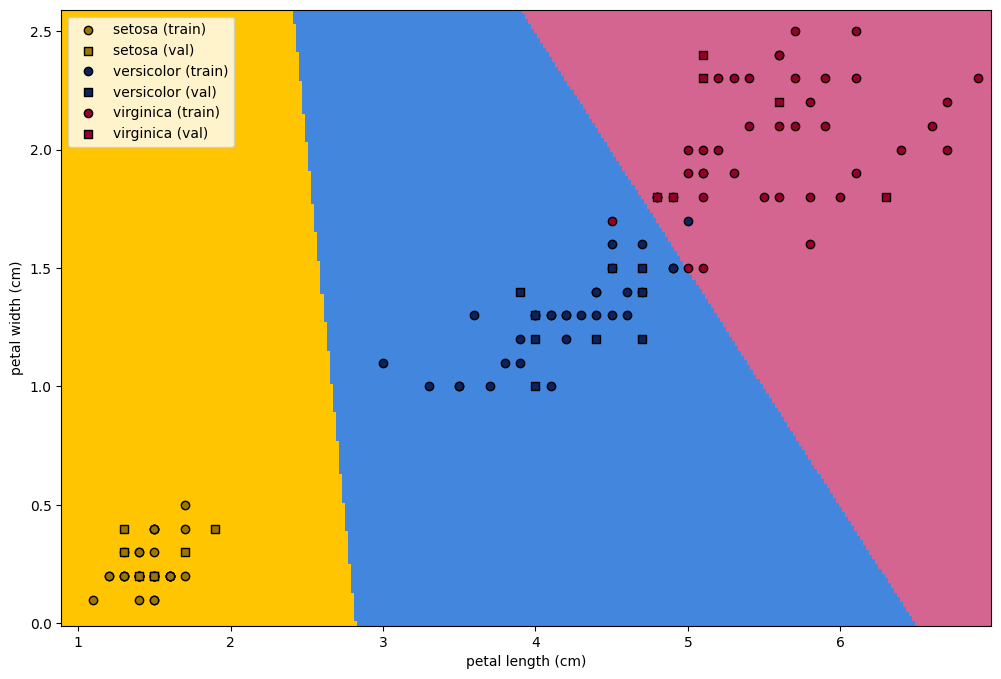

In [59]:
fig, ax = plt.subplots(figsize=(12, 8))
dark_cmap = mcolors.ListedColormap(["#9E7702", "#0C235D", "#980026"])
light_cmap = mcolors.ListedColormap(["#FFC500", "#4286DE", "#D46591"])

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict the class for each grid point using logit.predict() on the grid
Z = logit.predict(grid)

Z = Z.reshape(xx.shape)
ax.pcolormesh(xx, yy, Z, cmap=light_cmap, zorder=1, vmin=0, vmax=3)

for target in range(3):
    class_name = iris.target_names[target]
    ax.scatter(*X_train[y_train == target].T, label=f"{class_name} (train)", color=dark_cmap(target), edgecolor="black", zorder=2, marker="o")
    ax.scatter(*X_val[y_val == target].T, label=f"{class_name} (val)", color=dark_cmap(target), edgecolor="black", zorder=2, marker="s")

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.legend()
plt.show()

#### Question 4

Evaluating on the test dataset by calling the `predict` method of the `LogisticRegression` class and computing the accuracy. Or we can use the `score` method which does this for us.

In [60]:
# Evaluate the model on the test set
y_pred = (logit.predict(X_test))
test_accuracy = metrics.accuracy_score(y_test, y_pred)

# Print the test accuracy
print(f"Accuracy of the multiclass logit: {test_accuracy_linear:.2f}")

Accuracy of the multiclass logit: 0.96
